# Import packages

In [1]:
import sys
import os
import io
import yfinance as yf  # For stock data
import pandas as pd    # For data manipulation
import numpy as np     # For numerical operations
import datetime
from datetime import timedelta
#!pip install tabulate
from tabulate import tabulate
#!pip install xlsxwriter


import matplotlib.pyplot as plt  # For visualizations
#!pip install statsmodels
import statsmodels.api as sm

import importlib

# Import stock data

In [2]:
try:
    importlib.reload(sys.modules['data.api_get_sp500_15m'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from data.api_get_sp500_15m import apiGetStockData

apigetstockdata = apiGetStockData()
apigetstockdata.run()

outputs_dict = apigetstockdata.outputs_dict
data_e2_df = outputs_dict['data_e2_df'].copy()
data_e2_df

NO loaded libraries 'data.api_get_sp500_15m'


/home/user/Documents/airflow_predictive/dags/src/trading/data/api_get_sp500_15m.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(self.ticker, interval=self.interval, period=self.period)
[*********************100%***********************]  1 of 1 completed
2025-10-01 19:46:43,611 - data.api_get_sp500_15m - INFO - 
WU -> Stock market data: (1560, 7)
2025-10-01 19:46:43,637 - data.api_get_sp500_15m - INFO - 
WU -> Last reported dates into the data:
          Date  candles              min_datetime              max_datetime  \
53  2025-09-23       26 2025-09-23 13:30:00+00:00 2025-09-23 19:45:00+00:00   
54  2025-09-24       26 2025-09-24 13:30:00+00:00 2025-09-24 19:45:00+00:00   
55  2025-09-25       26 2025-09-25 13:30:00+00:00 2025-09-25 19:45:00+00:00   
56  2025-09-26       26 2025-09-26 13:30:00+00:00 2025-09-26 19:45:00+00:00   
57  2025-09-29       26 2025-09-29 13:30:00+00:00 2025-09-29 19:45:00+00:00   
58  2025-09-30  

,index,Datetime,Close,High,Low,Open,Volume,Date,Time,Open_adj
0,0,2025-07-09 13:30:00+00:00,6263.299805,6263.299805,6243.330078,6243.330078,94992737,2025-07-09,1330,NaN
1,1,2025-07-09 13:45:00+00:00,6265.459961,6269.160156,6263.240234,6263.240234,119912103,2025-07-09,1345,6263.299805
2,2,2025-07-09 14:00:00+00:00,6264.410156,6267.640137,6262.109863,6264.120117,121019365,2025-07-09,1400,6265.459961
3,3,2025-07-09 14:15:00+00:00,6256.080078,6265.100098,6254.399902,6264.390137,104990128,2025-07-09,1415,6264.410156
4,4,2025-07-09 14:30:00+00:00,6242.279785,6255.950195,6241.290039,6255.950195,104302636,2025-07-09,1430,6256.080078
...,...,...,...,...,...,...,...,...,...,...
1555,1555,2025-10-01 18:45:00+00:00,6716.080078,6718.209961,6715.350098,6716.580078,78005000,2025-10-01,1845,6716.569824
1556,1556,2025-10-01 19:00:00+00:00,6715.589844,6718.479980,6713.870117,6716.049805,89561000,2025-10-01,1900,6716.080078
1557,1557,2025-10-01 19:15:00+00:00,6715.720215,6716.470215,6712.000000,6715.759766,103145000,2025-10-01,1915,6715.589844
1558,1558,2025-10-01 19:30:00+00:00,6712.799805,6717.540039,6712.799805,6715.689941,142773000,2025-10-01,1930,6715.720215


# Compute indicators

In [889]:
try:
    importlib.reload(sys.modules['logics.compute_strategies_indicators'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from logics.compute_strategies_indicators import computeStrategiesIndicators


strategy = 'sp500_15m_v3'
computestrategiessndicators = computeStrategiesIndicators(strategy = strategy, inputs_dict = outputs_dict)
computestrategiessndicators.run()

outputs_dict = computestrategiessndicators.outputs_dict
data_e2_df = outputs_dict['data_e2_df'].copy()
data_e2_df

2025-10-02 00:16:00,199 - logics.compute_strategies_indicators - INFO - 
WU -> Report of market gain values:
    mg_bucket       min_s      max_s      avg_s  frequence
0           0 -100.819824  -6.619629 -13.136596        147
1           1   -6.569824  -3.729980  -4.931838        146
2           2   -3.710449  -2.399902  -2.985974        146
3           3   -2.380371  -1.270020  -1.826861        146
4           4   -1.260254  -0.159668  -0.718977        146
5           5   -0.149902   0.729980   0.329885        147
6           6    0.730469   1.739746   1.234096        147
7           7    1.750000   2.790039   2.226185        145
8           8    2.799805   4.309570   3.534233        146
9           9    4.310059   7.220215   5.499194        146
10         10    7.229980  62.909668  13.615985        147

2025-10-02 00:16:00,639 - logics.compute_strategies_indicators - INFO - 
WU -> Report of slopes values:
    slope_bucket      min_s      max_s     avg_s  frequence
0              0 -

,index,Datetime,Close,High,Low,Open,Volume,Date,Time,Open_adj,...,acceleration,signal,open_price,order_number,order_step,strategy_gain,pp_max_gain,strategy_return,acum_strategy_gain,max_strategy_gain
0,0,2025-07-07 13:30:00+00:00,6256.799805,6261.899902,6250.399902,6259.040039,83242768,2025-07-07,1330,NaN,...,0,0,0.000000,0,1,0.000000,-1.000000,0.000000,0.000000,0.000000
1,1,2025-07-07 13:45:00+00:00,6258.640137,6262.069824,6253.220215,6256.850098,108076830,2025-07-07,1345,6256.799805,...,0,0,0.000000,0,2,0.000000,-1.000000,0.000000,0.000000,0.000000
2,2,2025-07-07 14:00:00+00:00,6250.839844,6260.009766,6250.100098,6258.810059,106089089,2025-07-07,1400,6258.640137,...,0,0,0.000000,0,3,-0.000000,-1.000000,-0.000000,0.000000,-0.000000
3,3,2025-07-07 14:15:00+00:00,6252.379883,6256.319824,6248.220215,6250.600098,93438723,2025-07-07,1415,6250.839844,...,0,0,0.000000,0,4,0.000000,-1.000000,0.000000,0.000000,0.000000
4,4,2025-07-07 14:30:00+00:00,6249.000000,6252.830078,6247.629883,6252.430176,81115742,2025-07-07,1430,6252.379883,...,0,0,0.000000,0,5,-0.000000,-1.000000,-0.000000,0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,1555,2025-10-01 18:45:00+00:00,6716.080078,6718.209961,6715.350098,6716.580078,78005000,2025-10-01,1845,6716.569824,...,-1,1,6671.609863,80,20,-0.489746,0.989107,-0.000073,44.470215,44.959961
1608,1556,2025-10-01 19:00:00+00:00,6715.589844,6718.479980,6713.870117,6716.049805,89561000,2025-10-01,1900,6716.080078,...,1,1,6671.609863,80,21,-0.490234,0.978203,-0.000073,43.979980,44.959961
1609,1557,2025-10-01 19:15:00+00:00,6715.720215,6716.470215,6712.000000,6715.759766,103145000,2025-10-01,1915,6715.589844,...,2,1,6671.609863,80,22,0.130371,0.981103,0.000019,44.110352,44.959961
1610,1558,2025-10-01 19:30:00+00:00,6712.799805,6717.540039,6712.799805,6715.689941,142773000,2025-10-01,1930,6715.720215,...,3,1,6671.609863,80,23,-2.920410,0.916147,-0.000435,41.189941,44.959961


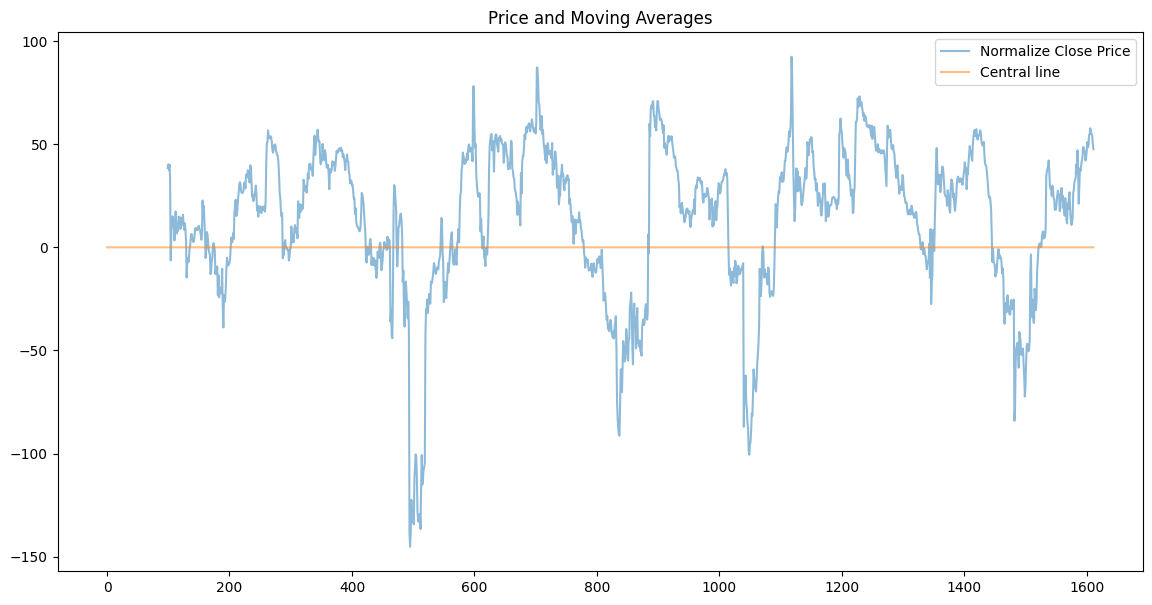

In [890]:
zeros_ls = [0] * len(data_e2_df['nclose'])

plt.figure(figsize=(14, 7))
plt.plot(data_e2_df['nclose'], label='Normalize Close Price', alpha=0.5)
plt.plot(zeros_ls, label='Central line', alpha=0.5)
plt.title(f"Price and Moving Averages")
plt.legend()
plt.show()

# Strategy implementation

In [990]:
try:
    importlib.reload(sys.modules['logics.strategies_implementation'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from logics.strategies_implementation import strategiesImplementation


strategy = 'sp500_15m_v3'
strategiesimplementation = strategiesImplementation(strategy = strategy, inputs_dict = outputs_dict)
strategiesimplementation.run()

outputs_dict = strategiesimplementation.outputs_dict
data_e2_df = outputs_dict['data_e2_df'].copy()
data_e2_df

,index,Datetime,Close,High,Low,Open,Volume,Date,Time,Open_adj,...,acceleration,signal,open_price,order_number,order_step,strategy_gain,pp_max_gain,strategy_return,acum_strategy_gain,max_strategy_gain
0,0,2025-07-07 13:30:00+00:00,6256.799805,6261.899902,6250.399902,6259.040039,83242768,2025-07-07,1330,NaN,...,0,0,0.000000,0,1,0.000000,-1.000000,0.000000,0.000000,0.000000
1,1,2025-07-07 13:45:00+00:00,6258.640137,6262.069824,6253.220215,6256.850098,108076830,2025-07-07,1345,6256.799805,...,0,0,0.000000,0,2,0.000000,-1.000000,0.000000,0.000000,0.000000
2,2,2025-07-07 14:00:00+00:00,6250.839844,6260.009766,6250.100098,6258.810059,106089089,2025-07-07,1400,6258.640137,...,0,0,0.000000,0,3,-0.000000,-1.000000,-0.000000,0.000000,-0.000000
3,3,2025-07-07 14:15:00+00:00,6252.379883,6256.319824,6248.220215,6250.600098,93438723,2025-07-07,1415,6250.839844,...,0,0,0.000000,0,4,0.000000,-1.000000,0.000000,0.000000,0.000000
4,4,2025-07-07 14:30:00+00:00,6249.000000,6252.830078,6247.629883,6252.430176,81115742,2025-07-07,1430,6252.379883,...,0,0,0.000000,0,5,-0.000000,-1.000000,-0.000000,0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,1555,2025-10-01 18:45:00+00:00,6716.080078,6718.209961,6715.350098,6716.580078,78005000,2025-10-01,1845,6716.569824,...,-1,1,6671.609863,82,20,-0.489746,0.989107,-0.000073,44.470215,44.959961
1608,1556,2025-10-01 19:00:00+00:00,6715.589844,6718.479980,6713.870117,6716.049805,89561000,2025-10-01,1900,6716.080078,...,1,1,6671.609863,82,21,-0.490234,0.978203,-0.000073,43.979980,44.959961
1609,1557,2025-10-01 19:15:00+00:00,6715.720215,6716.470215,6712.000000,6715.759766,103145000,2025-10-01,1915,6715.589844,...,2,1,6671.609863,82,22,0.130371,0.981103,0.000019,44.110352,44.959961
1610,1558,2025-10-01 19:30:00+00:00,6712.799805,6717.540039,6712.799805,6715.689941,142773000,2025-10-01,1930,6715.720215,...,3,1,6671.609863,82,23,-2.920410,0.916147,-0.000435,41.189941,44.959961


In [991]:
data_e2_df.value_counts(['signal'])

signal
 1        1171
 0         399
-1          42
Name: count, dtype: int64

In [992]:
#data_e21_df = data_e2_df[(data_e2_df['index'] >= 200)&(data_e2_df['index'] <= 300)].copy()
#data_e21_df = data_e21_df.reset_index(drop=True).copy()

#outputs_dict['data_e2_df'] = data_e21_df.copy()
#data_e21_df

# Performance metrics

2025-10-02 00:26:42,611 - logics.performance_metrics - INFO - 
WU -> intervals for compute performance of strategy:
Days: 7
interval: 15m

2025-10-02 00:26:42,616 - logics.performance_metrics - INFO - 
WU -> Data for compute performance of strategy:
(182, 28)

2025-10-02 00:26:42,644 - logics.performance_metrics - INFO - WU ->
Total Strategy Return: -0.12%
Total Market Return: 0.25%



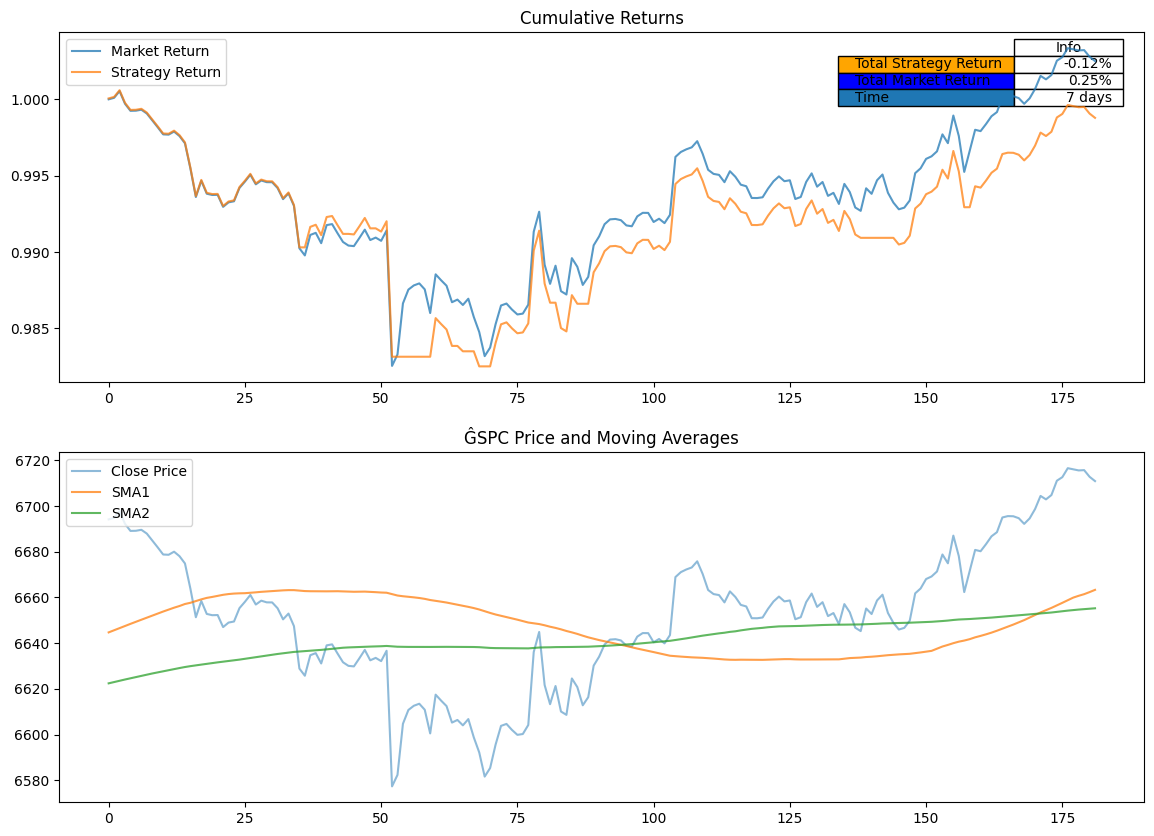

2025-10-02 00:26:43,265 - logics.performance_metrics - INFO - 
WU -> Operations profitability:
   is_profitable  oreders  gain_amount   gain_avg  candles
0          False        4   -65.679688 -16.419922    3.250
1           True        8   177.060547  22.132568   19.375

2025-10-02 00:26:43,266 - logics.performance_metrics - INFO - 
WU -> Strategy total gain points:(111.380859375)

2025-10-02 00:26:43,266 - logics.performance_metrics - INFO - 
WU -> Market total gain points:(16.10009765625)



,index,Datetime,Close,High,Low,Open,Volume,Date,Time,Open_adj,...,open_price,order_number,order_step,strategy_gain,pp_max_gain,strategy_return,acum_strategy_gain,max_strategy_gain,Cumulative Market Return,Cumulative Strategy Return
0,0,2025-09-23 13:30:00+00:00,6694.160156,6699.049805,6691.470215,6692.439941,101044198,2025-09-23,1330,6693.759766,...,6574.549805,71,85,0.400391,0.969129,0.000060,119.610352,123.420410,1.000000,1.000060
1,1,2025-09-23 13:45:00+00:00,6694.819824,6699.520020,6692.660156,6693.879883,137957160,2025-09-23,1345,6694.160156,...,6574.549805,71,86,0.659668,0.974474,0.000099,120.270020,123.420410,1.000099,1.000158
2,2,2025-09-23 14:00:00+00:00,6697.750000,6699.209961,6690.919922,6695.049805,122203540,2025-09-23,1400,6694.819824,...,6574.549805,71,87,2.930176,0.998216,0.000438,123.200195,123.420410,1.000536,1.000596
3,3,2025-09-23 14:15:00+00:00,6692.209961,6697.799805,6689.870117,6697.740234,104701514,2025-09-23,1415,6697.750000,...,6574.549805,71,88,-5.540039,0.953328,-0.000827,117.660156,123.420410,0.999709,0.999768
4,4,2025-09-23 14:30:00+00:00,6689.120117,6693.020020,6687.479980,6692.339844,90931140,2025-09-23,1430,6692.209961,...,6574.549805,71,89,-3.089844,0.928293,-0.000462,114.570312,123.420410,0.999247,0.999307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,177,2025-10-01 18:45:00+00:00,6716.080078,6718.209961,6715.350098,6716.580078,78005000,2025-10-01,1845,6716.569824,...,6671.609863,82,20,-0.489746,0.989107,-0.000073,44.470215,44.959961,1.003274,0.999556
178,178,2025-10-01 19:00:00+00:00,6715.589844,6718.479980,6713.870117,6716.049805,89561000,2025-10-01,1900,6716.080078,...,6671.609863,82,21,-0.490234,0.978203,-0.000073,43.979980,44.959961,1.003201,0.999483
179,179,2025-10-01 19:15:00+00:00,6715.720215,6716.470215,6712.000000,6715.759766,103145000,2025-10-01,1915,6715.589844,...,6671.609863,82,22,0.130371,0.981103,0.000019,44.110352,44.959961,1.003221,0.999502
180,180,2025-10-01 19:30:00+00:00,6712.799805,6717.540039,6712.799805,6715.689941,142773000,2025-10-01,1930,6715.720215,...,6671.609863,82,23,-2.920410,0.916147,-0.000435,41.189941,44.959961,1.002784,0.999067


In [994]:
try:
    importlib.reload(sys.modules['logics.performance_metrics'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from logics.performance_metrics import performanceMetrics


strategy = 'sp500_15m'

params_dict = {}
#params_dict['interval'] = '15m'
#params_dict['days'] = 7
#params_dict['ticker'] = 'ĜSPC'

performancemetrics = performanceMetrics(inputs_dict = outputs_dict, params_dict=params_dict)
#performancemetrics = performanceMetrics(inputs_dict = outputs_dict)
performancemetrics.run()

outputs_dict = performancemetrics.outputs_dict
data_e_df = outputs_dict['data_e_df'].copy()
data_e_df

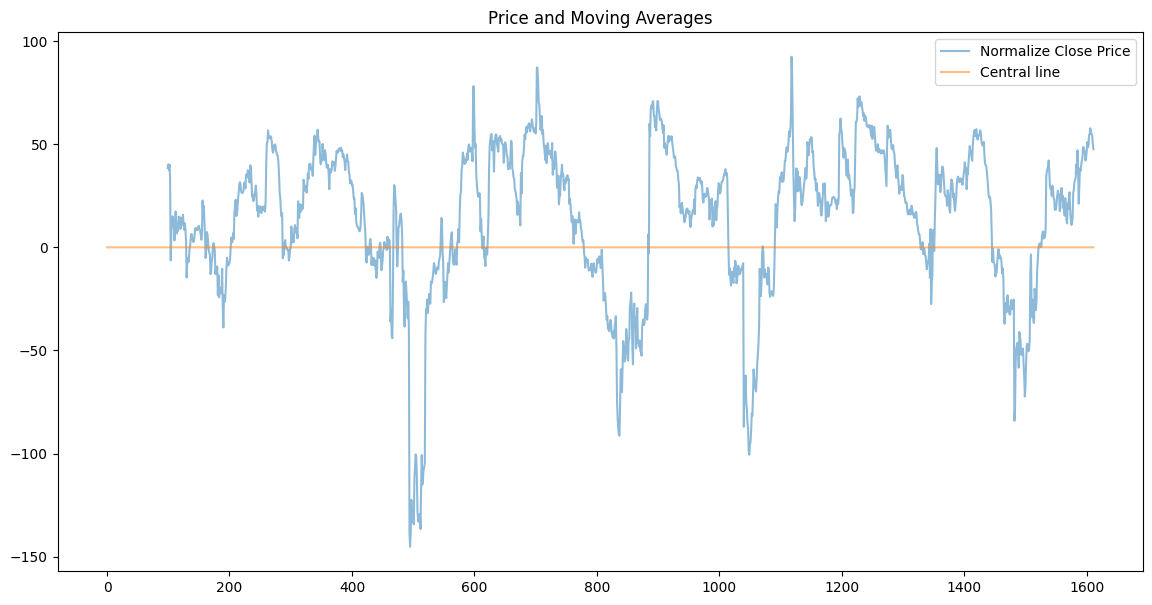

In [915]:
zeros_ls = [0] * len(data_e2_df['nclose'])

plt.figure(figsize=(14, 7))
plt.plot(data_e2_df['nclose'], label='Normalize Close Price', alpha=0.5)
plt.plot(zeros_ls, label='Central line', alpha=0.5)
plt.title(f"Price and Moving Averages")
plt.legend()
plt.show()

# Signal delivery

In [784]:
icols_ls = [
    'index',
    'Datetime',
    'Close',
    'nclose',
    'slope1',
    'signal',
    'order_number',
    'order_step',
    'tendency',
    'strategy_gain',
    'acum_strategy_gain',
    'max_strategy_gain',
    'pp_max_gain',
    'current_return',
    'strategy_return',
    'Cumulative Market Return', 
    'Cumulative Strategy Return'
]

data_e_df[icols_ls].tail(50)

,index,Datetime,Close,nclose,slope1,signal,order_number,order_step,tendency,strategy_gain,acum_strategy_gain,max_strategy_gain,pp_max_gain,current_return,strategy_return,Cumulative Market Return,Cumulative Strategy Return
1408,1408,2025-09-30 14:00:00+00:00,6651.850098,18.939604,-2.763027,1,75,45,-2,-6.080078,35.500000,59.469727,0.596942,-0.000913,-0.000913,1.061592,1.130684
1409,1409,2025-09-30 14:15:00+00:00,6653.180176,20.267383,-1.435358,1,75,46,-2,1.330078,36.830078,59.469727,0.619308,0.000200,0.000200,1.061804,1.130910
1410,1410,2025-09-30 14:30:00+00:00,6648.310059,15.388867,-2.760757,1,75,47,-3,-4.870117,31.959961,59.469727,0.537416,-0.000732,-0.000732,1.061027,1.130083
1411,1411,2025-09-30 14:45:00+00:00,6657.100098,23.896807,0.999309,1,75,48,1,8.790039,40.750000,59.469727,0.685223,0.001322,0.001322,1.062430,1.131577
1412,1412,2025-09-30 15:00:00+00:00,6653.500000,20.019209,0.776342,1,75,49,1,-3.600098,37.149902,59.469727,0.624686,-0.000541,-0.000541,1.061855,1.130965
1413,1413,2025-09-30 15:15:00+00:00,6646.759766,13.158677,-1.056817,1,75,50,-1,-6.740234,30.409668,59.469727,0.511347,-0.001013,-0.001013,1.060780,1.129819
1414,1414,2025-09-30 15:30:00+00:00,6645.290039,11.592549,-4.377331,0,75,51,-2,-1.469727,28.939941,59.469727,0.486633,-0.000221,-0.000221,1.060545,1.129569
1415,1415,2025-09-30 15:45:00+00:00,6655.169922,21.231934,0.207205,0,75,52,1,0.000000,28.939941,59.469727,0.486633,0.001487,0.000000,1.062122,1.129569
1416,1416,2025-09-30 16:00:00+00:00,6652.750000,18.674912,2.618809,0,75,53,2,-0.000000,28.939941,59.469727,0.486633,-0.000364,-0.000000,1.061736,1.129569
1417,1417,2025-09-30 16:15:00+00:00,6658.700195,24.432905,3.596405,0,75,54,3,0.000000,28.939941,59.469727,0.486633,0.000894,0.000000,1.062685,1.129569


In [785]:
icols_ls = [
    'index',
    'Datetime',
    'Close',
    'nclose',
    'slope1',
    'signal',
    'order_number',
    'order_step',
    'tendency',
    'market_gain',
    'strategy_gain',
    'acum_strategy_gain',
    'max_strategy_gain',
    'pp_max_gain',
    'current_return',
    'strategy_return',
    'Cumulative Market Return', 
    'Cumulative Strategy Return'
]

data_e_df[
    (data_e_df['index'] >= 350)&(data_e_df['index'] <= 400)
][icols_ls]





,index,Datetime,Close,nclose,slope1,signal,order_number,order_step,tendency,market_gain,strategy_gain,acum_strategy_gain,max_strategy_gain,pp_max_gain,current_return,strategy_return,Cumulative Market Return,Cumulative Strategy Return
350,350,2025-08-01 16:00:00+00:00,6264.240234,-100.433550,10.762082,0,16,6,3,4.810059,0.000000,-4.439941,2.629883,-1.688266,0.000768,0.000000,0.999732,1.014342
351,351,2025-08-01 16:15:00+00:00,6261.970215,-101.490771,3.871340,1,17,1,3,-2.270020,0.000000,0.000000,0.000000,-1.000000,-0.000362,0.000000,0.999370,1.014342
352,352,2025-08-01 16:30:00+00:00,6251.040039,-111.061948,-1.473075,0,17,2,-1,-10.930176,-10.930176,-10.930176,-10.930176,-1.000000,-0.001745,-0.001745,0.997625,1.012572
353,353,2025-08-01 16:45:00+00:00,6232.910156,-127.708633,-9.139643,0,17,3,-2,-18.129883,-0.000000,-10.930176,-10.930176,1.000000,-0.002900,-0.000000,0.994732,1.012572
354,354,2025-08-01 17:00:00+00:00,6227.080078,-132.012012,-10.821041,0,17,4,-3,-5.830078,-0.000000,-10.930176,-10.930176,1.000000,-0.000935,-0.000000,0.993801,1.012572
355,355,2025-08-01 17:15:00+00:00,6224.379883,-133.154907,-7.058226,0,17,5,-3,-2.700195,-0.000000,-10.930176,-10.930176,1.000000,-0.000434,-0.000000,0.993370,1.012572
356,356,2025-08-01 17:30:00+00:00,6226.240234,-129.757959,-0.729087,1,18,1,-3,1.860352,0.000000,0.000000,0.000000,-1.000000,0.000299,0.000000,0.993667,1.012572
357,357,2025-08-01 17:45:00+00:00,6225.060059,-129.383535,1.128238,0,18,2,1,-1.180176,-1.180176,-1.180176,-1.180176,-1.000000,-0.000190,-0.000190,0.993479,1.012380
358,358,2025-08-01 18:00:00+00:00,6216.180176,-136.629521,-1.004942,1,19,1,-1,-8.879883,0.000000,0.000000,0.000000,-1.000000,-0.001426,0.000000,0.992062,1.012380
359,359,2025-08-01 18:15:00+00:00,6235.029785,-116.326211,3.304926,1,19,2,1,18.849609,18.849609,18.849609,18.849609,1.000000,0.003032,0.003032,0.995070,1.015450


In [791]:
try:
    importlib.reload(sys.modules['logics.deliver_last_signal'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from logics.deliver_last_signal import deliverLastSignal

params_dict = {}
params_dict['strategy'] = strategy

deliverlastsignal = deliverLastSignal(inputs_dict = outputs_dict, params_dict=params_dict)
deliverlastsignal.run()

outputs_dict = deliverlastsignal.outputs_dict
last_signals_df = outputs_dict['last_signals_df'].copy()
last_signals_df

2025-10-01 23:56:00,095 - logics.deliver_last_signal - INFO - 
WU -> Last stock date: 2025-10-01 19:45:00+00:00
Limit date: 2025-10-01 20:15:00+00:00
Current date: 2025-10-02 04:56:00.095082+00:00

/home/user/Documents/airflow_predictive/dags/src/trading/logics/deliver_last_signal.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_signal_df['Market Status'] = 'LAST OPERATION'
/home/user/Documents/airflow_predictive/dags/src/trading/logics/deliver_last_signal.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,Datetime,Close,SMA1,slope1,signal,strategy_gain,acum_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,prev_signal,Action,Strategy
0,2025-10-01 19:00:00+00:00,6715.589844,6660.731196,-0.198921,1,-0.490234,43.979980,1.071764,1.139316,1.0,NA,sp500_15m
1,2025-10-01 19:15:00+00:00,6715.720215,6661.439297,-1.169816,1,0.130371,44.110352,1.071785,1.139338,1.0,NA,sp500_15m
2,2025-10-01 19:30:00+00:00,6712.799805,6662.350493,-1.766024,1,-2.920410,41.189941,1.071319,1.138842,1.0,NA,sp500_15m
3,2025-10-01 19:45:00+00:00,6710.919922,6663.326694,-2.562787,1,-1.879883,39.310059,1.071019,1.138523,1.0,NA,sp500_15m


In [787]:
last_signal_df = outputs_dict['last_signal_df'].copy()
last_signal_df

,Datetime,Close,SMA1,slope1,strategy_gain,acum_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,Action,Strategy,Market Status
0,2025-10-01 19:45:00+00:00,6710.919922,6663.326694,-2.562787,-1.879883,39.310059,1.071019,1.138523,NA,sp500_15m,CLOSED


In [788]:
last_signal = outputs_dict['last_signal'].copy()
last_signal

,Descripción,Valor
0,Datetime,2025-10-01 19:45:00+00:00
1,Close,6710.919922
2,SMA1,6663.326694
3,slope1,-2.562787
4,strategy_gain,-1.879883
5,acum_strategy_gain,39.310059
6,Cumulative Market Return,1.071019
7,Cumulative Strategy Return,1.138523
8,Action,NA
9,Strategy,sp500_15m


# Total strategy computation process

2025-10-01 23:56:24,406 - helpers.additional_functionalities - INFO - 
WU-> Function (sp50015mStrategy.prepares_process_parameters) processed! (elapsed minutes: 0.0)

2025-10-01 23:56:24,407 - helpers.gets_environmet_credentials - INFO - WU-> ENV VARS TAKEN FROM .ENV FILE
2025-10-01 23:56:24,407 - helpers.additional_functionalities - INFO - 
WU-> Function (Getsenvironmentcredentials.run) processed! (elapsed minutes: 0.0)

2025-10-01 23:56:24,450 - googleapiclient.discovery_cache - INFO - file_cache is only supported with oauth2client<4.0.0
2025-10-01 23:56:24,454 - helpers.additional_functionalities - INFO - 
WU-> Function (gdConnection.get_service) processed! (elapsed minutes: 0.001)

2025-10-01 23:56:24,454 - helpers.additional_functionalities - INFO - 
WU-> Function (gdConnection.run) processed! (elapsed minutes: 0.001)

2025-10-01 23:56:25,629 - integrations.gd_connection - INFO - Download 100.
2025-10-01 23:56:25,629 - helpers.additional_functionalities - INFO - 
WU-> Function (gd

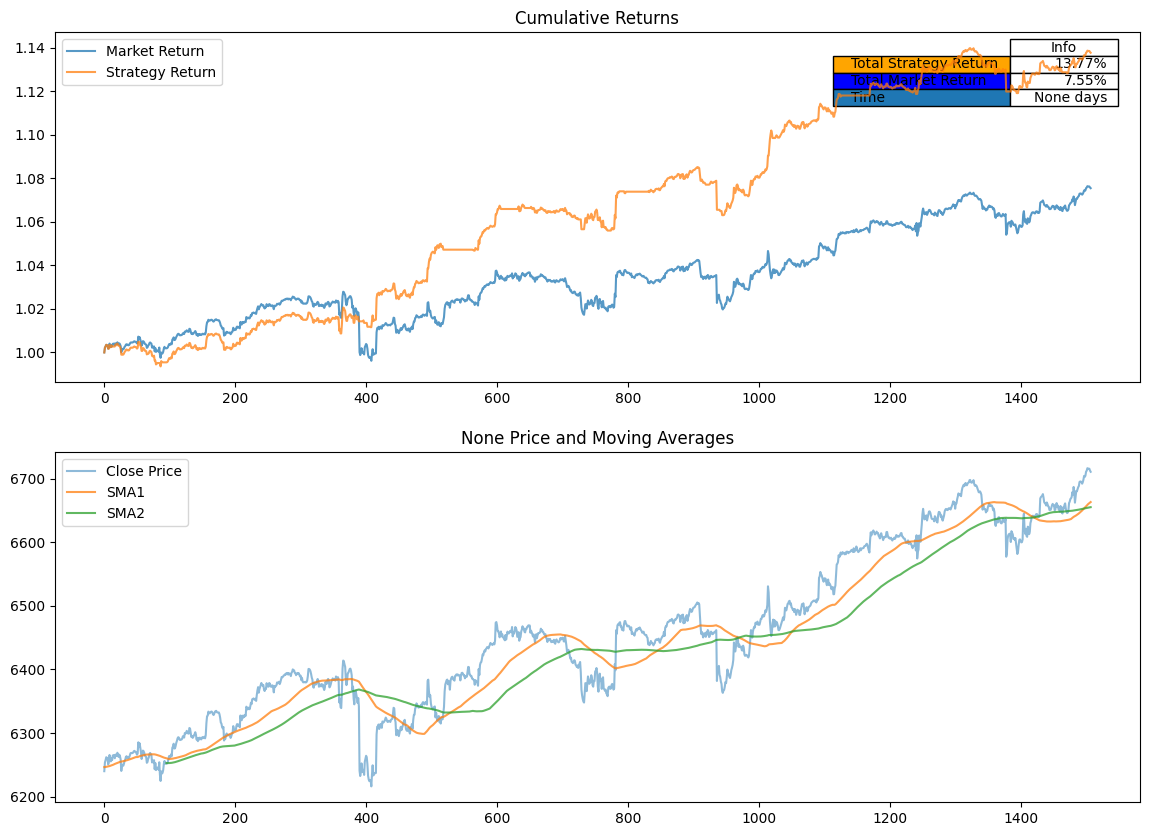

2025-10-01 23:56:48,093 - logics.performance_metrics - INFO - 
WU -> Operations profitability:
   is_profitable  oreders  gain_amount   gain_avg    candles
0          False       39  -382.858398  -9.816882   4.025641
1           True       43  1214.338867  28.240439  26.372093

2025-10-01 23:56:48,094 - logics.performance_metrics - INFO - 
WU -> Strategy total gain points:(831.48046875)

2025-10-01 23:56:48,095 - logics.performance_metrics - INFO - 
WU -> Market total gain points:(456.91015625)

2025-10-01 23:56:48,100 - logics.deliver_last_signal - INFO - 
WU -> Last stock date: 2025-10-01 19:45:00+00:00
Limit date: 2025-10-01 20:15:00+00:00
Current date: 2025-10-02 04:56:48.100473+00:00

/home/user/Documents/airflow_predictive/dags/src/trading/logics/deliver_last_signal.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,Datetime,Close,SMA1,slope1,strategy_gain,acum_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,Action,Strategy,Market Status
0,2025-10-01 19:45:00+00:00,6710.919922,6663.326694,-2.562787,-1.879883,39.310059,1.075458,1.137656,NA,sp500_15m_v3,CLOSED


In [792]:
try:
    importlib.reload(sys.modules['SP500_15m_strategy_v3'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from SP500_15m_strategy_v3 import sp50015mStrategy

sp50015mstrategy = sp50015mStrategy()
sp50015mstrategy.run()
outputs_dict = sp50015mstrategy.outputs_dict
last_signal_df = outputs_dict['last_signal_df'].copy()
last_signal_df

# Send notification

## Send notification to whatsapp

In [232]:
outputs_dict.keys()

dict_keys(['fcredentials_df', 'connections_ls', 'conns_str', 'env_file', 'env_ls', 'data_e2_df', 'data_e_df', 'imagebuffer', 'last_signals_df', 'last_signal_df', 'last_signal'])

In [233]:
last_signal = outputs_dict['last_signal_df'].copy()

last_signal = last_signal_df.T.reset_index().copy()
rencols_dict = {
    'index':'Descripción',
    1:'Valor',
}
last_signal = last_signal.rename(columns=rencols_dict).copy()
last_signal_tab = tabulate(last_signal, headers = 'keys', tablefmt = 'pretty', showindex=False, colalign=("left", "right"))
last_signal_tab = '```' + last_signal_tab + '```'
last_signal_tab

'```+----------------------------+---------------------------+\n| Descripción                |                         0 |\n+----------------------------+---------------------------+\n| Datetime                   | 2025-10-01 17:00:00+00:00 |\n| Close                      |           6698.7099609375 |\n| SMA1                       |        6652.3557958984375 |\n| slope1                     |     5.179627436091268e-05 |\n| strategy_gain              |              4.1201171875 |\n| acum_strategy_gain         |            85.89013671875 |\n| Cumulative Market Return   |        1.0008097545218222 |\n| Cumulative Strategy Return |         1.004652098019046 |\n| Action                     |                        NA |\n| Strategy                   |              sp500_15m_v2 |\n| Market Status              |                      OPEN |\n+----------------------------+---------------------------+```'

In [223]:
try:
    importlib.reload(sys.modules['integrations.whatsapp_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.whatsapp_connection import whatsappConnection


whatsappconnection = whatsappConnection()

recepient_phone_number = '573104888469'
msg_body = last_signal_tab

whatsappconnection.send_message(msg_body = msg_body, recepient_phone_number=recepient_phone_number)


{"messaging_product":"whatsapp","contacts":[{"input":"573104888469","wa_id":"573104888469"}],"messages":[{"id":"wamid.HBgMNTczMTA0ODg4NDY5FQIAERgSRjcyMTM5NDgxRjcxRDFBNjBGAA=="}]}


In [234]:
try:
    importlib.reload(sys.modules['integrations.whatsapp_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.whatsapp_connection import whatsappConnection


whatsappconnection = whatsappConnection()
imagebuffer = outputs_dict['imagebuffer']

whatsappconnection.send_image(recepient_phone_number=recepient_phone_number, image_buffer = imagebuffer, msg_body=msg_body)

{'id': '1435464070884470'}
{'messaging_product': 'whatsapp', 'contacts': [{'input': '573104888469', 'wa_id': '573104888469'}], 'messages': [{'id': 'wamid.HBgMNTczMTA0ODg4NDY5FQIAERgSQzRGQ0ZDMEU2MjZEOEU4OEQ2AA=='}]}


In [225]:
data_report_df = outputs_dict['data_e_df'].copy()
data_report_df['Datetime'] = data_report_df['Datetime'].apply(lambda x: str(x))
data_report_df['Datetime'] = data_report_df['Datetime'].astype('str')

In [226]:
document_buffer = io.BytesIO()
writer_excel = pd.ExcelWriter(document_buffer, engine='xlsxwriter')
data_report_df.to_excel(writer_excel, sheet_name='Hoja1', index=False)
writer_excel.close()

In [227]:
try:
    importlib.reload(sys.modules['integrations.whatsapp_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.whatsapp_connection import whatsappConnection


whatsappconnection = whatsappConnection()

whatsappconnection.send_file(recepient_phone_number=recepient_phone_number, document_buffer = document_buffer, extension='xlsx')

{'id': '796501512988086'}
{'messaging_product': 'whatsapp', 'contacts': [{'input': '573104888469', 'wa_id': '573104888469'}], 'messages': [{'id': 'wamid.HBgMNTczMTA0ODg4NDY5FQIAERgSMzYyM0JGMjlEMjNERUNFRjhDAA=='}]}


## Send notifications to telegram

In [265]:
try:
    importlib.reload(sys.modules['integrations.telegram_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.telegram_connection import telegramConnection

telegramconnection =telegramConnection()

chat_id = telegramconnection.get_group_chat_id()
chat_id

-4948600790

In [270]:
try:
    importlib.reload(sys.modules['integrations.telegram_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.telegram_connection import telegramConnection

telegramconnection =telegramConnection()

imagebuffer = imagebuffer
market_status_tab2 = tabulate(last_signal, headers = 'keys', tablefmt = 'pretty', showindex=False, colalign=("left", "right"))
message_text = '<pre>' + market_status_tab2 + '</pre>'

telegramconnection.send_image(imagebuffer=imagebuffer, message_text = message_text)

2025-09-26 21:50:42,015 - integrations.telegram_connection - INFO - {'ok': True, 'result': {'message_id': 18, 'from': {'id': 8121151732, 'is_bot': True, 'first_name': 'William bot', 'username': 'WilliamUyasan_bot'}, 'chat': {'id': -4948600790, 'title': 'WU -> Stock positions', 'type': 'group', 'all_members_are_administrators': True, 'accepted_gift_types': {'unlimited_gifts': False, 'limited_gifts': False, 'unique_gifts': False, 'premium_subscription': False}}, 'date': 1758941441, 'photo': [{'file_id': 'AgACAgEAAxkDAAMGaNcJAf2ar3czBUIsROHANM52JpMAAhoLaxtTcrlGpNa8KOxXTf4BAAMCAANzAAM2BA', 'file_unique_id': 'AQADGgtrG1NyuUZ4', 'file_size': 767, 'width': 90, 'height': 64}, {'file_id': 'AgACAgEAAxkDAAMGaNcJAf2ar3czBUIsROHANM52JpMAAhoLaxtTcrlGpNa8KOxXTf4BAAMCAANtAAM2BA', 'file_unique_id': 'AQADGgtrG1NyuUZy', 'file_size': 11323, 'width': 320, 'height': 228}, {'file_id': 'AgACAgEAAxkDAAMGaNcJAf2ar3czBUIsROHANM52JpMAAhoLaxtTcrlGpNa8KOxXTf4BAAMCAAN4AAM2BA', 'file_unique_id': 'AQADGgtrG1NyuUZ9', '

In [235]:
try:
    importlib.reload(sys.modules['integrations.telegram_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.telegram_connection import telegramConnection

telegramconnection =telegramConnection()

telegramconnection.send_file(document_buffer=document_buffer, extension = 'xlsx')

2025-10-01 12:46:50,235 - integrations.telegram_connection - INFO - {'ok': True, 'result': {'message_id': 90, 'from': {'id': 8121151732, 'is_bot': True, 'first_name': 'William bot', 'username': 'WilliamUyasan_bot'}, 'chat': {'id': -4948600790, 'title': 'WU -> Stock positions', 'type': 'group', 'all_members_are_administrators': True, 'accepted_gift_types': {'unlimited_gifts': False, 'limited_gifts': False, 'unique_gifts': False, 'premium_subscription': False}}, 'date': 1759340809, 'document': {'file_name': 'document', 'file_id': 'BQACAgEAAxkDAANaaN1pCUChbF8K_PEGTjMl1MvVycIAAtAHAAKDZPFGwYudbvJJJ5E2BA', 'file_unique_id': 'AgAD0AcAAoNk8UY', 'file_size': 45814}}}


In [188]:
try:
    importlib.reload(sys.modules['integrations.telegram_connection'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from integrations.telegram_connection import telegramConnection

telegramconnection =telegramConnection()

chat_id = telegramconnection.send_message(message_text = message_text)
chat_id

2025-09-26 17:55:33,484 - integrations.telegram_connection - INFO - {'ok': True, 'result': {'message_id': 13, 'from': {'id': 8121151732, 'is_bot': True, 'first_name': 'William bot', 'username': 'WilliamUyasan_bot'}, 'chat': {'id': -4948600790, 'title': 'WU -> Stock positions', 'type': 'group', 'all_members_are_administrators': True, 'accepted_gift_types': {'unlimited_gifts': False, 'limited_gifts': False, 'unique_gifts': False, 'premium_subscription': False}}, 'date': 1758927333, 'text': '+----------------------------+---------------------------+\n| Descripción                |                     Valor |\n+----------------------------+---------------------------+\n| Datetime                   | 2025-09-26 15:00:00+00:00 |\n| Close                      |           6608.6298828125 |\n| SMA1                       |         6645.333583984375 |\n| slope1                     |       -2.5169921874996817 |\n| signal                     |                         1 |\n| Cumulative Market Return

## Total notification sending

In [200]:
try:
    importlib.reload(sys.modules['SP500_15m_strategy'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from SP500_15m_strategy import sp50015mStrategy

sp50015mstrategy = sp50015mStrategy()

sp50015mstrategy.send_notification(inputs_dict = outputs_dict)

2025-09-30 22:22:55,335 - SP500_15m_strategy - INFO - 

WU -> MARKET CLOSED, PROCESS TERMINATED!




# Total process

2025-09-30 22:23:24,966 - helpers.gets_environmet_credentials - INFO - WU-> ENV VARS TAKEN FROM .ENV FILE
2025-09-30 22:23:24,969 - helpers.additional_functionalities - INFO - 
WU-> Function (Getsenvironmentcredentials.run) processed! (elapsed minutes: 0.0)

2025-09-30 22:23:25,043 - googleapiclient.discovery_cache - INFO - file_cache is only supported with oauth2client<4.0.0
2025-09-30 22:23:25,046 - helpers.additional_functionalities - INFO - 
WU-> Function (gdConnection.get_service) processed! (elapsed minutes: 0.001)

2025-09-30 22:23:25,048 - helpers.additional_functionalities - INFO - 
WU-> Function (gdConnection.run) processed! (elapsed minutes: 0.001)

2025-09-30 22:23:26,123 - integrations.gd_connection - INFO - Download 100.
2025-09-30 22:23:26,125 - helpers.additional_functionalities - INFO - 
WU-> Function (gdConnection.download_file) processed! (elapsed minutes: 0.018)

/home/user/Documents/airflow_predictive/dags/src/trading/integrations/gd_connection.py:179: FutureWarnin

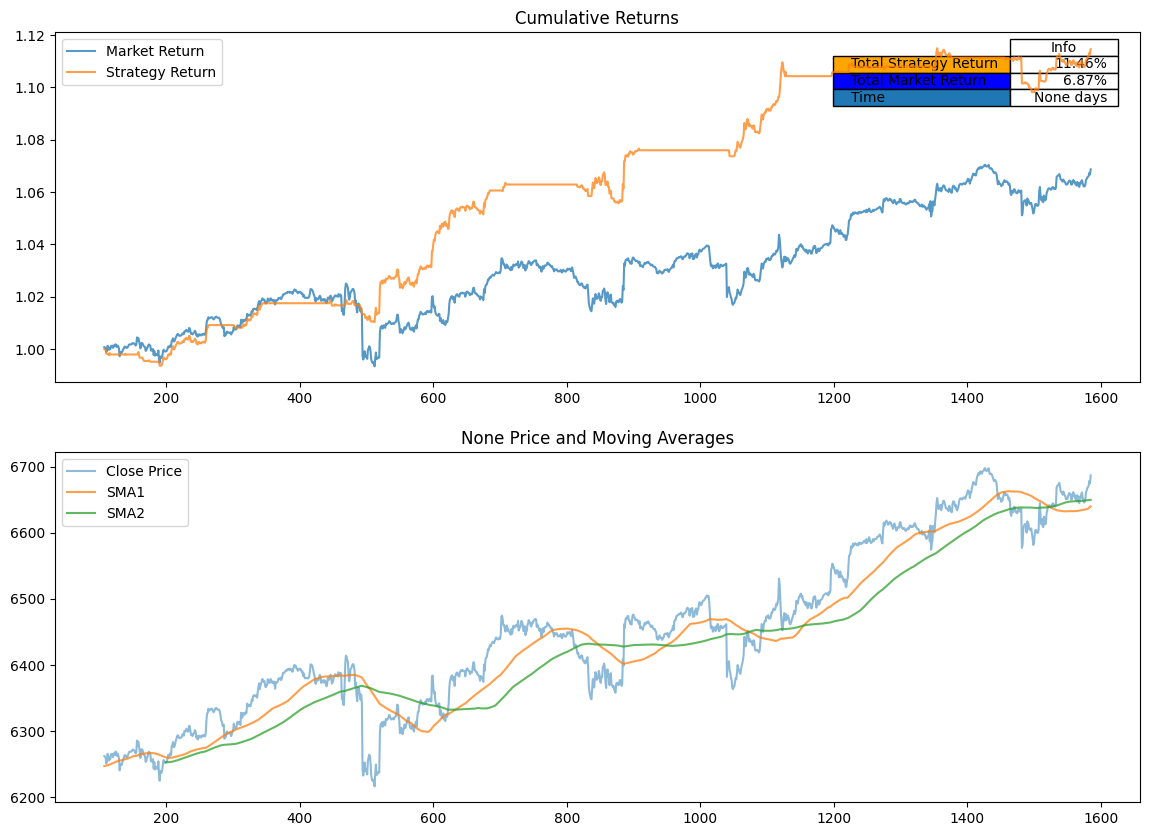

2025-09-30 22:23:50,331 - logics.performance_metrics - INFO - 
WU -> Operations profitability:
   is_profitable  oreders  gain_amount   gain_avg    candles
0          False       43  -282.200195  -6.562795   3.116279
1           True       26   977.520020  37.596924  21.192308

2025-09-30 22:23:50,332 - logics.performance_metrics - INFO - 
WU -> Strategy total gain points:(695.31982421875)

2025-09-30 22:23:50,333 - logics.performance_metrics - INFO - 
WU -> Market total gain points:(425.85986328125)

2025-09-30 22:23:50,338 - logics.deliver_last_signal - INFO - 
WU -> Last stock date: 2025-09-30 19:45:00+00:00
Limit date: 2025-09-30 20:15:00+00:00
Current date: 2025-10-01 03:23:50.338939+00:00

/home/user/Documents/airflow_predictive/dags/src/trading/logics/deliver_last_signal.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [201]:
try:
    importlib.reload(sys.modules['logics.deliver_last_signal'])
    importlib.reload(sys.modules['SP500_15m_strategy_v3'])
except Exception as e:
    print('NO loaded libraries',  e)
    pass

from SP500_15m_strategy_v3 import sp50015mStrategy

sp50015mstrategy = sp50015mStrategy()
sp50015mstrategy.run()
sp50015mstrategy.send_notification(inputs_dict = outputs_dict)

In [283]:
outputs_dict = sp50015mstrategy.outputs_dict
outputs_dict.keys()

dict_keys(['stock_df', 'data_e2_df', 'data_e_df', 'imagebuffer', 'last_signals_df', 'last_signal_df'])

In [284]:

last_signal_df

,Datetime,Close,SMA1,slope1,strategy_gain,acum_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,Action,Strategy,Market Status
0,2025-09-26 19:45:00+00:00,6643.540039,6634.503896,0.746973,0.0,-2.589844,1.004111,1.003954,NA,sp500_15m,CLOSE


In [285]:

if market_status != 'CLOSE'

0    CLOSE
Name: Market Status, dtype: object

# Observations

In [36]:
icols_ls = ['Datetime','Close', 'Open_adj', 'SMA1','sma1_diff', 'signal',
       'order_number', 'order_step', 'strategy_gain', 'pp_change_gain', 'order_gain_balance', 'order_loss_balance',
       'acum_strategy_gain', 'pp_strategy_gain','slope1','tendency',
       'current_return','strategy_return', 'Cumulative Market Return', 'Cumulative Strategy Return']

#data_e_df[icols_ls]

data_e_df[
    #data_e_df['order_number'].isin([1,2])
    #data_e2_df['order_number'].isin([69,70])
    #data_e2_df['signal']==-1
    (data_e_df['index']>=350)&(data_e_df['index']<=400)
][icols_ls]

,Datetime,Close,Open_adj,SMA1,sma1_diff,signal,order_number,order_step,strategy_gain,pp_change_gain,order_gain_balance,order_loss_balance,acum_strategy_gain,pp_strategy_gain,slope1,tendency,current_return,strategy_return,Cumulative Market Return,Cumulative Strategy Return
350,2025-07-21 19:30:00+00:00,6309.370117,6314.839844,6291.810010,17.560107,0,34,12,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-4.652002,-6,-0.000866,-0.000000,1.013101,1.014203
351,2025-07-21 19:45:00+00:00,6307.459961,6309.370117,6292.426709,15.033252,0,34,13,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-3.307031,-6,-0.000303,-0.000000,1.012794,1.014203
352,2025-07-22 13:30:00+00:00,6309.669922,6307.459961,6293.075410,16.594512,0,34,14,0.000000,-0.000000,1.560059,-2.060059,-0.500000,-0.000079,-1.741992,-6,0.000350,0.000000,1.013149,1.014203
353,2025-07-22 13:45:00+00:00,6288.279785,6309.669922,6293.534507,-5.254722,0,34,15,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-6.106104,-7,-0.003390,-0.000000,1.009715,1.014203
354,2025-07-22 14:00:00+00:00,6291.040039,6288.279785,6293.903906,-2.863867,0,34,16,0.000000,-0.000000,1.560059,-2.060059,-0.500000,-0.000079,-7.064990,-8,0.000439,0.000000,1.010158,1.014203
355,2025-07-22 14:15:00+00:00,6290.879883,6291.040039,6294.469204,-3.589321,0,34,17,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-5.360986,-8,-0.000025,-0.000000,1.010132,1.014203
356,2025-07-22 14:30:00+00:00,6297.319824,6290.879883,6295.195303,2.124521,1,35,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.695996,1,0.001024,0.000000,1.011166,1.014203
357,2025-07-22 14:45:00+00:00,6299.310059,6297.319824,6295.789502,3.520557,1,35,2,1.990234,0.000000,1.990234,0.000000,1.990234,0.000316,3.125000,2,0.000316,0.000316,1.011486,1.014524
358,2025-07-22 15:00:00+00:00,6296.459961,6299.310059,6296.391104,0.068857,0,35,3,-2.850098,-1.432041,1.990234,-2.850098,-0.859863,-0.000137,1.873047,2,-0.000452,-0.000452,1.011028,1.014065
359,2025-07-22 15:15:00+00:00,6296.979980,6296.459961,6296.987202,-0.007222,0,35,4,0.000000,-0.000000,1.990234,-2.850098,-0.859863,-0.000137,-0.386963,-1,0.000083,0.000000,1.011112,1.014065
